In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from PIL import Image
import keras.utils as image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
import tensorflow as tf



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/base32cortadaIgualada/train')

In [ ]:
os.chdir('Vale-TCC')
print(os.getcwd())

/content/Vale-TCC


In [ ]:
print(os.getcwd())

/content


In [ ]:
print(os.getcwd())
os.chdir('drive/MyDrive/Vale - TCC')
print(os.getcwd())#

/content
/content/drive/MyDrive/Vale - TCC


In [3]:
# cria uma copia do zipado e atribui o nome vale-tcc
!cp '/content/drive/MyDrive/Vale - TCC/base32cortadaIgualadaValidacao.zip' Vale-TCC

In [4]:
#unizpa essa copia e a coloca no destino
!unzip -uq Vale-TCC -d /content

In [ ]:
#estudo recorte imagem
img = Image.open('base32/train/D - Medio Atrito/MCH004W21A_R_20190819_160400.png')
img.size

(32, 32)

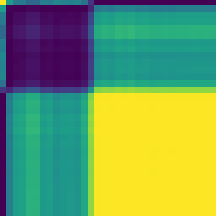

In [ ]:
img

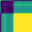

In [ ]:
newsize = (32,32)
img.resize(newsize)

In [ ]:
dirs = os.listdir('base32' )
defeitos = os.listdir('base32cortadaIgualada/train')
dirs, defeitos

(['validation', '.ipynb_checkpoints', 'train'],
 ['D - Alto Atrito',
  'D - Atraso Partida',
  'D - Deslig Motor',
  'D - Medio Atrito',
  'D - Problema na Fase 2'])

In [ ]:
for i in dirs:
  for j in defeitos:
    leituras = os.listdir('base32/' + i + '/' + j)
    print(len(leituras))

95
1820
12
20
360
359


KeyboardInterrupt: ignored

In [ ]:
for i in dirs:
  for j in defeitos:
    leituras = os.listdir('base32/' + i + '/' + j)
    
    for k in leituras:
      img = Image.open('base32/' + i + '/' + j + '/' + k)
      img = img.resize(newsize)
      img.save('base32/' + i + '/' + j + '/' + k, "PNG")
    img.size
    print(j)

D - Medio Atrito
D - Defeito Não Identificado
D - Problema Medicao
D - Alto Atrito
D - Problema na Fase 2
D - Atraso Partida
D - Múltiplos Acionamentos Simultâneos
D - Deslig Motor
D - Medio Atrito
D - Defeito Não Identificado
D - Problema Medicao
D - Alto Atrito
D - Problema na Fase 2
D - Atraso Partida
D - Múltiplos Acionamentos Simultâneos
D - Deslig Motor


In [ ]:
os.chdir('train/D - Medio Atrito')

In [ ]:
os.listdir()

['D - Alto Atrito',
 'D - Atraso Partida',
 'D - Deslig Motor',
 'D - Medio Atrito',
 'D - Problema na Fase 2']

In [ ]:
print(len([name for name in os.listdir('.') if os.path.isfile(name)]))

3


In [105]:
# image dimensions, set as per your preference.
img_width, img_height = 32, 32

train_data_dir = 'base32cortadaIgualada/train'
validation_data_dir = 'base32cortadaIgualada/validation'

In [ ]:
#base nao oversampled
batch_size = 128
nb_train_samples = 14512
nb_validation_samples = 3576
epochs = 100

In [ ]:
#base nao oversampled cortada
batch_size = 128
nb_train_samples = 9275
nb_validation_samples = 2299
epochs = 100

In [ ]:
#base oversampled
batch_size = 128
nb_train_samples = 37779 #14512
nb_validation_samples = 2307 #3576
epochs = 100

In [106]:
#base oversampled na validacao tb
batch_size = 128
nb_train_samples = 37749 #14512
nb_validation_samples = 9376
epochs = 50

In [107]:
train_datagen = ImageDataGenerator(rescale=1./255)
#shear_range=0.2,
#zoom_range=0.2,
#horizontal_flip=True

In [108]:
# rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [109]:
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size=(img_width, img_height),
shuffle=False,
batch_size=batch_size,
class_mode='categorical')

Found 37749 images belonging to 5 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))# original eh 2,2

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))

In [130]:
validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
shuffle=False,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='categorical')

Found 9376 images belonging to 5 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1))) # camada adicionada

model.add(Conv2D(64, (1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))# original eh 2,2

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['acc'])

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

In [ ]:
len(model.layers)

15

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 activation_5 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 13, 13, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                  

In [ ]:
class_weights = class_weight.compute_class_weight(
           class_weight = 'balanced',
            classes = np.unique(train_generator.classes), 
            y = train_generator.classes)

train_class_weights = dict(enumerate(class_weights))


In [ ]:
class_weights

array([ 5.16713092, 22.62195122, 35.        ,  0.25324232,  1.27403846])

In [ ]:
class_weights = {0: 5.16713092,
                1: 22.62195122,
                2: 35.,
                3: 0.25324232,
                4: 1.27403846}

In [ ]:
model.fit(
train_generator,
steps_per_epoch=nb_train_samples // batch_size,
epochs=epochs,
#class_weight=class_weights,
validation_data=validation_generator,
validation_steps=nb_validation_samples // batch_size)
model.save('/content/drive/MyDrive/Vale - TCC/ModelosSalvos/modelo128densebatch128epochs50')

Epoch 1/50
294/294 [==============================] - 56s 186ms/step - loss: 1.1774 - acc: 0.4694 - val_loss: 0.9956 - val_acc: 0.5879
Epoch 2/50
294/294 [==============================] - 54s 183ms/step - loss: 0.6178 - acc: 0.6986 - val_loss: 0.9261 - val_acc: 0.6507
Epoch 3/50
294/294 [==============================] - 54s 183ms/step - loss: 0.5121 - acc: 0.7647 - val_loss: 1.2011 - val_acc: 0.6673
Epoch 4/50
294/294 [==============================] - 53s 181ms/step - loss: 0.4714 - acc: 0.7786 - val_loss: 0.8583 - val_acc: 0.6818
Epoch 5/50
294/294 [==============================] - 54s 183ms/step - loss: 0.4029 - acc: 0.8126 - val_loss: 0.8730 - val_acc: 0.6991
Epoch 6/50
294/294 [==============================] - 55s 186ms/step - loss: 0.4025 - acc: 0.8122 - val_loss: 0.9298 - val_acc: 0.6988
Epoch 7/50
294/294 [==============================] - 54s 184ms/step - loss: 0.3760 - acc: 0.8312 - val_loss: 1.0222 - val_acc: 0.7463
Epoch 8/50
294/294 [==============================] - 5

In [ ]:
model.save('/content/drive/MyDrive/Vale - TCC/ModelosSalvos/modeloSalvoCortadoBalanceadoOverValidacao')

In [ ]:
Y_test = np.argmax(validation_generator, axis=1)

In [5]:
model = keras.models.load_model('/content/drive/MyDrive/Vale - TCC/ModelosSalvos/modelo128dense')

In [ ]:
#Testar a performance em cada classe

In [ ]:
test_datagen

In [ ]:
#load the image
my_image = load_img('data/validation/D - Alto Atrito/MCH004W21B_R_20190831_074925.png', target_size=(432, 288))

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)

#make the prediction
prediction = model.predict(my_image)

In [ ]:
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

28/28 [==============================] - 2s 44ms/step
Confusion Matrix
[[  87    0    0    8    0    0    0    0]
 [   0   20    0    0    0    0    0    0]
 [   0    0    0    1    6    0    0    0]
 [   0    1    8    0    3    0    0    0]
 [  55    9    0 1341  415    0    0    0]
 [   0    0    0    3    5    0    0    0]
 [ 100   40   45  700  369    0    0    0]
 [   0   10    0  106  244    0    0    0]]


In [ ]:
y_pred = np.argmax(model.predict(validation_generator),  axis=1)



74/74 [==============================] - 6s 76ms/step


In [111]:
predicoes = model.predict(validation_generator)

74/74 [==============================] - 7s 92ms/step


In [124]:
len(gram)

32

In [126]:
len(validation_generator[1])

IndexError: ignored

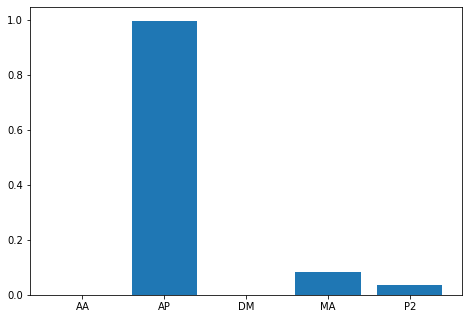

In [ ]:
predicoes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ["AA", "AP", "DM", "MA", "P2"]
students = predicoes[2550]
ax.bar(langs,students)
plt.show()

In [ ]:
len(y_pred)

2307

In [ ]:
len(validation_generator.classes)

2307

In [ ]:
from sklearn import metrics

In [ ]:
matrix = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
matrix

array([[  11,    4,    0,   65,   15],
       [   1,    0,    0,   16,    3],
       [   0,    1,    0,   11,    0],
       [  95,   32,    8, 1361,  324],
       [  18,    7,    0,  265,   70]])

In [ ]:
np.delete(model.predict(validation_generator), np.argmax(model.predict(validation_generator),  axis=1), 1)

74/74 [==============================] - 6s 78ms/step


array([], shape=(9376, 0), dtype=float32)

In [ ]:
top_n_1 = l[np.argsort(-l)[0:4]]
top_n_2 = mo[np.argpartition(l, -4)[-4:]]


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

74/74 [==============================] - 6s 76ms/step


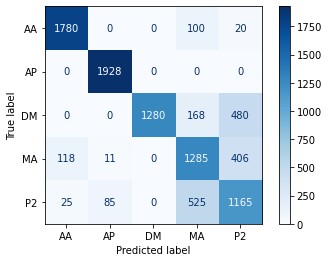

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_pred = np.argmax(model.predict(validation_generator),  axis=1)
y_pred = np.array(y_pred)
y_test = np.array(validation_generator.classes)
labels = ["AA", "AP", "DM", "MA", "P2"]

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

#load the image
my_image = load_img('/content/base32/validation/D - Medio Atrito/MCH004W21A_N_20191119_120732.png', target_size=(32, 32))

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)

#make the prediction
prediction = model.predict(my_image)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
# open method used to open different extension image file
im = Image.open(r"/content/base32/validation/D - Problema na Fase 2/MCH004W22A_N_20191004_162851.png") 
my_image = load_img('/content/base32/validation/D - Problema na Fase 2/MCH004W22A_N_20191004_162851.png', target_size=(32, 32))

#preprocess the image

teste_unico = ImageDataGenerator(rescale=1./255)
teste_unico.flow(my_image, batch_size=1)
# This method will show image in any image viewer 
im.show() 
model.predict(teste_unico)

ValueError: ignored

In [ ]:
## avaliação do algoritmo

In [ ]:
# cria uma copia do zipado e atribui o nome h004
!cp '/content/drive/MyDrive/Vale - TCC/H004.zip' Leituras

In [ ]:
#unizpa essa copia e a coloca no destino
!unzip -uq Leituras -d /content/Leituras

In [7]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 7.2 MB/s 


In [22]:
import os
import zipfile
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from pyts.image import GramianAngularField
import io

def stringToFloat(dataFrame, name):
    dataFrame[name] = pd.to_numeric(dataFrame[name], downcast="float")

def getData(sample, dataType):

    '''
    Brief : Funcao que faz a leitura de dados armazenados em arquivos .txt
            de acordo com o tipo de dado especificado:
            - 1. Intervalos de tempo;
            - 2. Corrente;
            - 3. CorrenteRMS.

    Parameters: Nome da leitura e o tipo de dado que se deseja ler;

    Returns:    Um array com os valores numericos convertidos para numpy.
    '''

    try:
        f = open(sample) 
        lines = f.readlines()
        i = 0
        while(i < len(lines)):
            i += 1
            if(lines[i] == "***End_of_Header***\n"): # marca o fim do cabecalho
                break  
        inicio = i + 2

        linhas = lines[inicio:]
        df = pd.DataFrame(linhas)
        df = df[0].str.split('\t', expand=True)
        stringToFloat(df, 2)

        if(dataType == 'tempo'):
            return df[0]
        if(dataType == 'corrente'):
            return df[1]
        if(dataType == 'correnteRMS'):
            return df[2]
     
    except FileNotFoundError:
        print('Leitura não encontrada: ', sample)

def plotImagem_GAF(base):
    gasf = GramianAngularField(image_size=32, method='summation')
    base = base.replace(np.nan,0)
    X_gasf = gasf.fit_transform(base.to_numpy().reshape(1, -1))
    X_gasf = X_gasf[0,:,:]
    plt.imshow(X_gasf)
    plt.axis('off')
    return plt.imshow(X_gasf)

def saveImagem_GAF(base):
    gasf = GramianAngularField(image_size=32, method='summation')
    base = base.replace(np.nan,0)
    X_gasf = gasf.fit_transform(base.to_numpy().reshape(1, -1))
    X_gasf = X_gasf[0,:,:]
    #plt.figure(figsize=(32, 32),dpi=1)
    plt.axis('off')
    print(type(X_gasf))
    plt.imshow(X_gasf)
    plt.figure(frameon=False)
    plt.savefig('teste.jpg')
    return X_gasf
  

def image_to_byte_array(image: Image) -> bytes:
  # BytesIO is a fake file stored in memory
  imgByteArr = io.BytesIO()
  # image.save expects a file as a argument, passing a bytes io ins
  image.save(imgByteArr, format=image.format)
  # Turn the BytesIO object back into a bytes object
  imgByteArr = imgByteArr.getvalue()
  return imgByteArr

<class 'numpy.ndarray'>


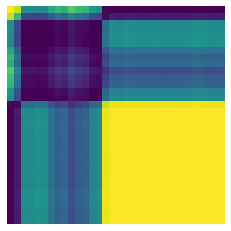

<Figure size 432x288 with 0 Axes>

In [23]:
corrente = getData("MCH004W21A_N_20190830_080349.txt", 'correnteRMS')
gram = saveImagem_GAF(corrente)

In [131]:
img_array = image.img_to_array(cortado)
img_batch = np.expand_dims(img_array, axis=0)

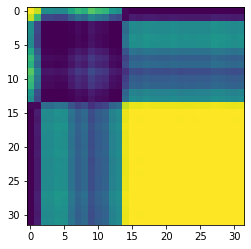

In [34]:
plt.imshow(gram)
plt.savefig('teste2.png')

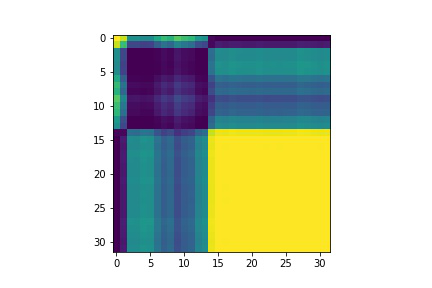

In [51]:
img = Image.open('teste2.jpg')
img

In [44]:
img.size

(432, 288)

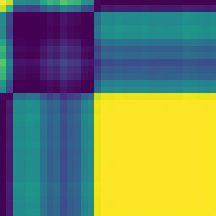

In [97]:
box = (114, 36, 330, 252)
img2 = img.crop(box)
img2

In [102]:
cortado = img2.resize((32,32))

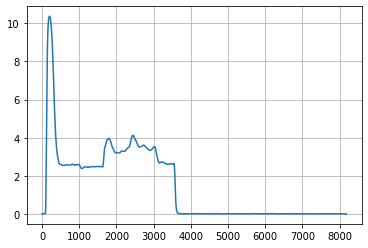

In [17]:
plt.plot(corrente)
plt.grid(True)
plt.show()

In [104]:
imagemTest = ImageDataGenerator(rescale=1./255).apply_transform(cortado)

TypeError: ignored

In [32]:
img = image_to_byte_array(gram)

AttributeError: ignored

In [129]:
model.predict(validation_generator[20])

ValueError: ignored